In [1]:
#libraries for data analysis
import pandas as pd
import numpy as np
#libraries for normality tests
from scipy import stats
from scipy.stats import shapiro
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#import the Device Datasets
xls = pd.ExcelFile('Device_Bounce_Rate.xlsx')

In [3]:
Desktop = pd.read_excel(xls, 'Desktop')
Mobile = pd.read_excel(xls, 'Mobile')
Tablet = pd.read_excel(xls, 'Tablet')

In [4]:
#Remove the dates for ease
Desktop = Desktop['Bounce Rate']
Mobile = Mobile['Bounce Rate']
Tablet = Tablet['Bounce Rate']

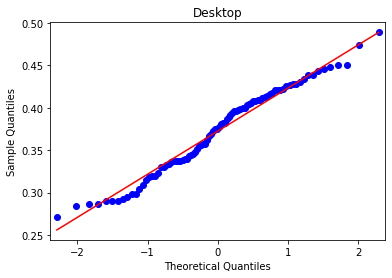

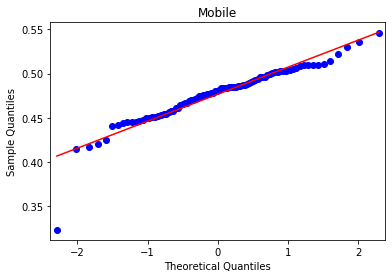

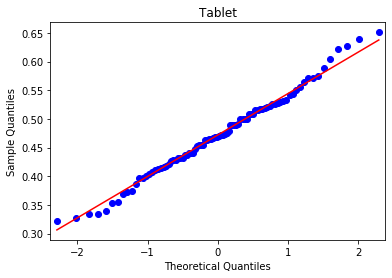

In [5]:
#plot all datasets using qqplot to check for normality
names = ["Desktop", "Mobile","Tablet",]
for index, i in enumerate((Desktop, Mobile,Tablet)):
    
    qqplot(i, line='s')
    plt.title(names[index])
    pyplot.show()

### Both datasets look not normal since they fall off the qq plot

In [6]:
# normality test with Shapiro
names = ["Desktop", "Mobile","Tablet",]
for index, i in enumerate((Desktop, Mobile,Tablet)):
    stat, p = shapiro(i)
    print(names[index])
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    # interpret
    alpha = 0.05
    if p > alpha:
        
        print('Sample looks Gaussian (fail to reject H0)')
    else:
        print('Sample does not look Gaussian (reject H0)')

Desktop
Statistics=0.973, p=0.054
Sample looks Gaussian (fail to reject H0)
Mobile
Statistics=0.916, p=0.000
Sample does not look Gaussian (reject H0)
Tablet
Statistics=0.989, p=0.668
Sample looks Gaussian (fail to reject H0)


### Since not all datasets are normaly distributed non - parametric tests should be used except for Desktop - Tablet Test where t-test should be used.

In [7]:
### Create a single dataframe
from pandas import DataFrame
data = {"Desktop": Desktop ,"Mobile": Mobile,
         "Tablet": Tablet,}
df = DataFrame(data, columns = names)
df.head()

,Desktop,Mobile,Tablet
0,0.343891,0.483254,0.529412
1,0.289604,0.445415,0.333333
2,0.271480,0.441748,0.474576
3,0.289742,0.472689,0.521739
4,0.319242,0.464368,0.520833


In [8]:
#Visualise basic descriptive statistics about the dataset
import pandas_profiling as pdp

report = pdp.ProfileReport(df, title='Pandas Profiling Report')

report.to_file(output_file="Correlation_report.html")

report

In [9]:
# compute the correlation
df_corr = df.corr(method='spearman')
df_corr

,Desktop,Mobile,Tablet
Desktop,1.000000,0.047652,0.091501
Mobile,0.047652,1.000000,-0.025989
Tablet,0.091501,-0.025989,1.000000


In [10]:
from scipy import stats
# Matrix of correlation p-values
df_p = pd.DataFrame()  
for x in df.columns:
    for y in df.columns:
        corr = stats.pearsonr(df[x], df[y])
        df_corr.loc[x,y] = corr[0]
        df_p.loc[x,y] = corr[1]
df_p

,Desktop,Mobile,Tablet
Desktop,0.000000,0.178375,0.326151
Mobile,0.178375,0.000000,0.439450
Tablet,0.326151,0.439450,0.000000


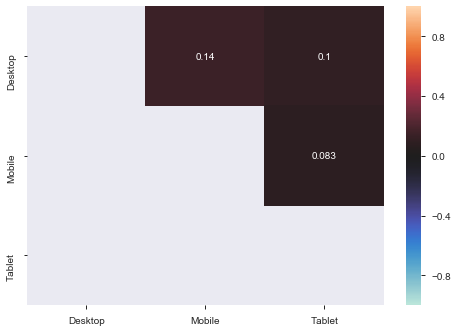

In [11]:
#Visualise the correlation
import seaborn as sn
mask = np.tril(df.corr())
corrMatrix = df.corr()

sn.heatmap(corrMatrix, annot=True, vmin=-1, vmax=1, center= 0, mask = mask)